In [61]:
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import plotly.plotly as py
#import plotly.tools as tls
import seaborn as sns
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import acf, pacf
#from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
#from statsmodels.tsa.arima_model import ARIMA
#from pandas import DataFrame
#from sklearn.metrics import mean_squared_error
from math import sqrt  



In [62]:
%matplotlib inline   

In [63]:
Waves = pd.read_csv('Buoys-Waves.csv')
Control = pd.read_csv('control.csv')

In [64]:
Waves = Waves.rename(columns = {'Hs' : 'significant_wave_height' , 'Hmax' : 'maximum_wave_height', 'Tz' : 'zero_wave_period',
                       'Tp' : 'peak_wave_period' , 'SST' : 'sea_surface_temperature' , 'Peak Direction' : 'peak_direction'})

In [65]:
print(Waves.head()) 
#https://www.somacon.com/p570.php
Control.head()

       Date/Time  significant_wave_height  maximum_wave_height  \
0  1/1/2017 0:00                  -99.900               -99.90   
1  1/1/2017 0:30                    0.875                 1.39   
2  1/1/2017 1:00                    0.763                 1.15   
3  1/1/2017 1:30                    0.770                 1.41   
4  1/1/2017 2:00                    0.747                 1.16   

   zero_wave_period  peak_wave_period  peak_direction  sea_surface_temperature  
0           -99.900           -99.900           -99.9                   -99.90  
1             4.421             4.506           -99.9                   -99.90  
2             4.520             5.513            49.0                    25.65  
3             4.582             5.647            75.0                    25.50  
4             4.515             5.083            91.0                    25.45  


,Species Name,Species Code,Date,Area,Location,Latitude,Longitude,Fate,Length (m),Water Temp (C),Number Caught
0,BULL WHALER,37018021.0,8/4/2017,Bribie Island,Woorim (Bribie Island),-27.06835189,153.2113376,Dead,1.55,21.0,1
1,TIGER SHARK,37018022.0,8/8/2017,Bribie Island,Woorim (Bribie Island),27.06511,153.2108,Euthanised,3.55,19.0,1
2,BULL WHALER,37018021.0,3/3/2017,Bundaberg,Neilson Park,-24.80429012,152.4641092,Dead,1.56,26.0,1
3,BULL WHALER,37018021.0,3/3/2017,Bundaberg,Kellys Beach,-24.83788865,152.4673179,Dead,1.79,26.0,1
4,BULL WHALER,37018021.0,17/03/2017,Bundaberg,Neilson Park,-24.80864323,152.4327342,Dead,1.56,26.0,1


In [66]:
# Variable meanings in the wave datset
# Date/Time - Date
#Hs -Significant wave height, an average of the highest third of the waves in a record
#Hmax -The maximum wave height in the record
#Tz- The zero upcrossing wave period
#Tp- The peak energy wave period
#Peak Direction -Direction (related to true north) from which the peak period waves are coming from
#SST -Approximation of sea surface temperature


In [67]:

print (len(Control))
print (len(Waves)) 

511
43728


# Problem Statement and Background

Problem Statement and Background

Using data collected by buoys on oceanic wave patterns 
over a 30-month period, we will be looking at data dealing with wave height, 
energy, frequency, temperature, etc. during half hour intervals and attempting 
to find interactions between these columns, as well as plotting and predicting the wave 
pattern in the future given certain parameters base on the collected data. These are our
main goals going into the research. To find interactions between data columns, if any exist 
(ex. Peak wave height and average wave height).Using the location and direction of the wave 
currents, being able to plot the patterns of the waves. Plot the patterns of ocean currents
throughout a calendar year. Predict information about future wave patterns given a set of
parameters such as time of year or ocean temperature. After analyzing what time and temperatures
occur with the waves, it would be in our best interest if we could also investigate if they are
related to the time and temperature that sharks often would attack. If there, is a relationship
#between shark attacks to wave occurrence we can see when it is safe to surf as well  as should 
#surfing not even be an option during certain times of the day / seasons. We know that shark attacks 
#are not predictable so far because almost all beaches have shark nets for protection. 
#So almost all shark attacks are random. We plan to use our data to see if these attacks 
#are more than random occurrences.

# Data Sources

The Data Source(s) You Intend to Use 

https://www.kaggle.com/jolasa/waves-measuring-buoys-data-mooloolaba
https://www.data.qld.gov.au/dataset/coastal-data-system-waves-mooloolaba

We found two datasets from kaggle that would be very beneficial for our project. The first 
dataset has 24000 rows and 6 columns. While the second dataset has 511 rows and 11 columns .
I plan to collect more data as the project goes on because the more the better. For now, I have
enough data to be satisfied for a quality project. I plan to join both datasets into one 
but it will take some time to figure out. The first dataset is stored in the Waves data frame
in codio in the file (WavesCode)   and the second dataset is stored in the “Control” data 
frame in the file (WavesCode). There is many data to work with so it should come out very 
clean and consistent.     

# Data Flaws/Weaknesses and Cleaning

Data Flaws/Weaknesses and Cleaning

I was able to successfully join the two datasets. Any errors I did have in my data I either manually fixed or wrote a function 
that would clean it. 
 

In [68]:
#cleaning up the data
#Waves = Waves.rename(columns = {'Hs' : 'significant_wave_height' , 'Hmax' : 'maximum_wave_height', 'Tz' : 'zero_wave_period',
#'Tp' : 'peak_wave_period' , 'SST' : 'sea_surface_temperature' , 'Peak Direction' : 'peak_direction'})
Waves=Waves.replace(-99.9,np.nan)
Waves=Waves.interpolate(limit_direction='both')
Waves.head()

,Date/Time,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature
0,1/1/2017 0:00,0.875,1.39,4.421,4.506,49.0,25.65
1,1/1/2017 0:30,0.875,1.39,4.421,4.506,49.0,25.65
2,1/1/2017 1:00,0.763,1.15,4.520,5.513,49.0,25.65
3,1/1/2017 1:30,0.770,1.41,4.582,5.647,75.0,25.50
4,1/1/2017 2:00,0.747,1.16,4.515,5.083,91.0,25.45


# Basic Data Characteristics

Basic Data Characteristics
In my codio file I was able to look more into these types of graphs and display them better.

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


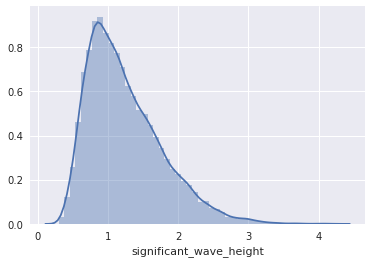

In [69]:
sns.distplot( Waves["significant_wave_height"] )

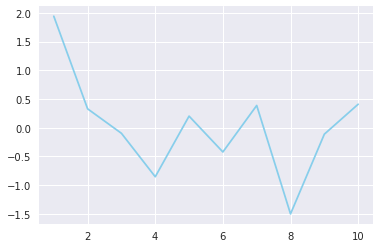

In [70]:
Waves=pd.DataFrame({'sea_surface_temperature': range(1,11), 'maximum_wave_height': np.random.randn(10) })
plt.plot( 'sea_surface_temperature', 'maximum_wave_height', data=Waves, color='skyblue')
plt.show()
#Displays a relationship of the max wave height in comparison to the approximate sea surface temperature.

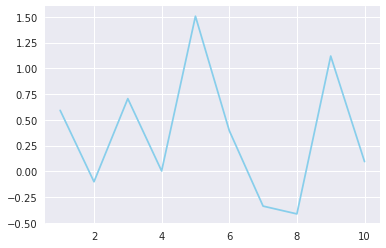

None


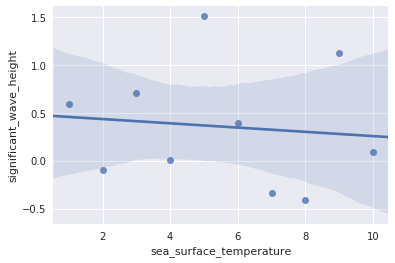

In [71]:
Waves=pd.DataFrame({'sea_surface_temperature': range(1,11), 'significant_wave_height': np.random.randn(10) })
plt.plot( 'sea_surface_temperature', 'significant_wave_height', data=Waves, color='skyblue')
print(plt.show())

sns.regplot(x=Waves["sea_surface_temperature"], y=Waves["significant_wave_height"])
#Displays a relationship of the significant wave height in comparison to the approximate sea surface temperature.

# Surprises

Surprises
I did not have any surprises so far in my data. The majority of shark attacks occur near the 
shore and in the surf zone because their natural preys live in these areas. But attacks also 
take place in steep underwater drop-offs, where divers often swim. The wave height should not 
be a surprise where the attacks will take place. 

# Next Steps, any Obstacles


My next step would be to join the two datasets, which may take some time. Once I do this, it 
should be much easier to work with. I also plan to use another kaggle file that I was not able to
download due to the size of the file. It is not much of an obstacle but it does briefly delay our 
coding. The file contained moon phases, which we could study and possibly link to our wave data. 
With this information, we could look at if there was a three-way relationship between waves, sharks
attacks, and moon phases.     

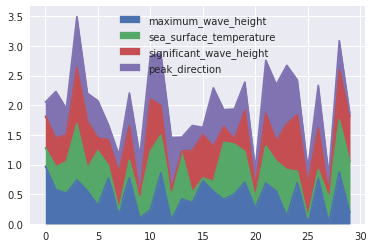

In [72]:
Waves = pd.DataFrame(np.random.rand(30, 4), columns=['maximum_wave_height', 'sea_surface_temperature', 'significant_wave_height',
'peak_direction'])
 
# plot
Waves.plot.area()
# The height of each coloured stack represents the percentage proportion of that category at a given point in time. For this 
# I wanted to see the the categories of the maximum height, sea surface temperature, significant wave height, and the peak 
#direction of where the waves are coming from. 

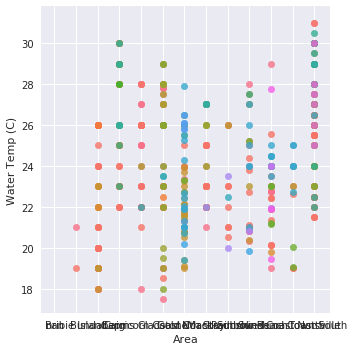

In [73]:
sns.lmplot( x="Area", y="Water Temp (C)", data=Control, fit_reg=False, hue='Species Name', legend=False)
# Shows the area and water temperature with what species of shark attacked. 
# Will adjust X and Y axis later once I figure out how to.  

In [74]:
Control.head()

,Species Name,Species Code,Date,Area,Location,Latitude,Longitude,Fate,Length (m),Water Temp (C),Number Caught
0,BULL WHALER,37018021.0,8/4/2017,Bribie Island,Woorim (Bribie Island),-27.06835189,153.2113376,Dead,1.55,21.0,1
1,TIGER SHARK,37018022.0,8/8/2017,Bribie Island,Woorim (Bribie Island),27.06511,153.2108,Euthanised,3.55,19.0,1
2,BULL WHALER,37018021.0,3/3/2017,Bundaberg,Neilson Park,-24.80429012,152.4641092,Dead,1.56,26.0,1
3,BULL WHALER,37018021.0,3/3/2017,Bundaberg,Kellys Beach,-24.83788865,152.4673179,Dead,1.79,26.0,1
4,BULL WHALER,37018021.0,17/03/2017,Bundaberg,Neilson Park,-24.80864323,152.4327342,Dead,1.56,26.0,1


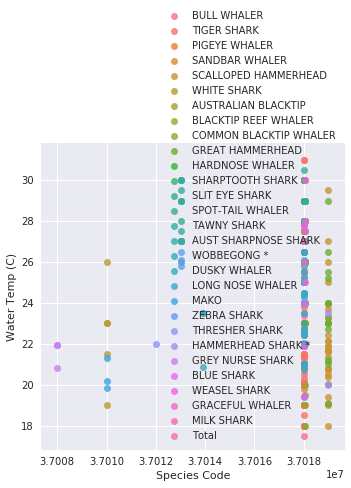

In [75]:
sns.lmplot( x="Species Code", y="Water Temp (C)", data=Control, fit_reg=False, hue='Species Name', legend=False)

plt.legend(loc='lower right')
 

In [76]:
Waves = pd.read_csv('Buoys-Waves.csv')
Control = pd.read_csv('control.csv')

In [77]:
print(Waves)
print(Control)


              Date/Time      Hs   Hmax      Tz      Tp  Peak Direction    SST
0         1/1/2017 0:00 -99.900 -99.90 -99.900 -99.900           -99.9 -99.90
1         1/1/2017 0:30   0.875   1.39   4.421   4.506           -99.9 -99.90
2         1/1/2017 1:00   0.763   1.15   4.520   5.513            49.0  25.65
3         1/1/2017 1:30   0.770   1.41   4.582   5.647            75.0  25.50
4         1/1/2017 2:00   0.747   1.16   4.515   5.083            91.0  25.45
5         1/1/2017 2:30   0.718   1.61   4.614   6.181            68.0  25.45
6         1/1/2017 3:00   0.707   1.34   4.568   4.705            73.0  25.50
7         1/1/2017 3:30   0.729   1.21   4.786   4.484            63.0  25.50
8         1/1/2017 4:00   0.733   1.20   4.897   5.042            68.0  25.50
9         1/1/2017 4:30   0.711   1.29   5.019   8.439            66.0  25.50
10        1/1/2017 5:00   0.698   1.11   4.867   4.584            64.0  25.55
11        1/1/2017 5:30   0.686   1.14   4.755   5.211          

In [78]:
Waves_ControlTogether = pd.concat([Waves, Control], axis = 1)
Waves_ControlTogether = Waves_ControlTogether.rename(columns = {'Hs' : 'significant_wave_height' , 'Hmax' : 'maximum_wave_height', 'Tz' : 'zero_wave_period',
                       'Tp' : 'peak_wave_period' , 'SST' : 'sea_surface_temperature' , 'Peak Direction' : 'peak_direction'})
Waves_ControlTogether


,Date/Time,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature,Species Name,Species Code,Date,Area,Location,Latitude,Longitude,Fate,Length (m),Water Temp (C),Number Caught
0,1/1/2017 0:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90,BULL WHALER,37018021.0,8/4/2017,Bribie Island,Woorim (Bribie Island),-27.06835189,153.2113376,Dead,1.55,21.0,1.0
1,1/1/2017 0:30,0.875,1.39,4.421,4.506,-99.9,-99.90,TIGER SHARK,37018022.0,8/8/2017,Bribie Island,Woorim (Bribie Island),27.06511,153.2108,Euthanised,3.55,19.0,1.0
2,1/1/2017 1:00,0.763,1.15,4.520,5.513,49.0,25.65,BULL WHALER,37018021.0,3/3/2017,Bundaberg,Neilson Park,-24.80429012,152.4641092,Dead,1.56,26.0,1.0
3,1/1/2017 1:30,0.770,1.41,4.582,5.647,75.0,25.50,BULL WHALER,37018021.0,3/3/2017,Bundaberg,Kellys Beach,-24.83788865,152.4673179,Dead,1.79,26.0,1.0
4,1/1/2017 2:00,0.747,1.16,4.515,5.083,91.0,25.45,BULL WHALER,37018021.0,17/03/2017,Bundaberg,Neilson Park,-24.80864323,152.4327342,Dead,1.56,26.0,1.0
5,1/1/2017 2:30,0.718,1.61,4.614,6.181,68.0,25.45,BULL WHALER,37018021.0,14/09/2017,Bundaberg,Neilson Park,-24.80061173,152.4609586,Dead,1.72,20.0,1.0
6,1/1/2017 3:00,0.707,1.34,4.568,4.705,73.0,25.50,BULL WHALER,37018021.0,2/11/2017,Bundaberg,Neilson Park,-24.80654196,152.4651796,Dead,1.87,24.0,1.0
7,1/1/2017 3:30,0.729,1.21,4.786,4.484,63.0,25.50,BULL WHALER,37018021.0,2/11/2017,Bundaberg,Kellys Beach,-24.82150404,152.4715669,Dead,2.24,24.0,1.0
8,1/1/2017 4:00,0.733,1.20,4.897,5.042,68.0,25.50,PIGEYE WHALER,37018026.0,12/3/2017,Bundaberg,Neilson Park,-24.80221732,152.4631429,Dead,1.17,26.0,1.0
9,1/1/2017 4:30,0.711,1.29,5.019,8.439,66.0,25.50,PIGEYE WHALER,37018026.0,6/4/2017,Bundaberg,Kellys Beach,-24.81967477,152.4720265,Dead,1.63,23.0,1.0


/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


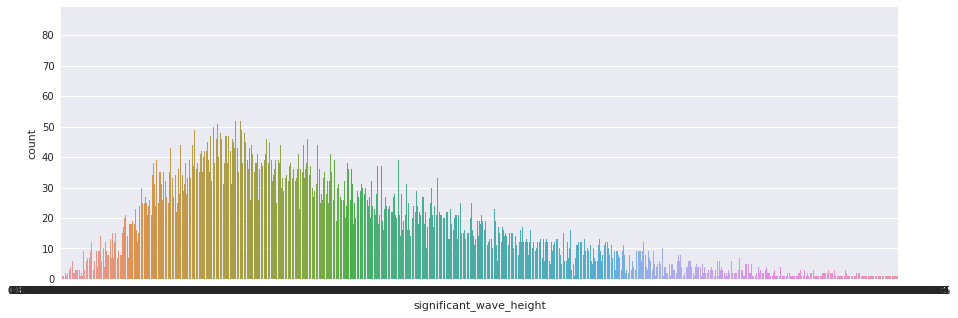

In [79]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(Waves_ControlTogether['significant_wave_height'])
plt.show()